### Importing Libraries and data

In [10]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP for text pre-processing
import nltk
import scipy
import re
from scipy import spatial
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
tokenizer = ToktokTokenizer()

# other libraries
import gensim
from gensim.models import Word2Vec
import itertools
from sklearn.decomposition import PCA
from sklearn.feature_extraction. text import TfidfVectorizer
from sklearn.decomposition import PCA

# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# remove warnings
import warnings
warnings.filterwarnings (action = 'ignore')

C:\Users\K Ravinder Reddy\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [9]:
data=pd.read_csv("flipkart_com-ecommerce_sample.csv")
data.head()

,uniq_id,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


### Data Exploration

In [3]:
data.shape

(20000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   product_url              20000 non-null  object 
 2   product_name             20000 non-null  object 
 3   product_category_tree    20000 non-null  object 
 4   pid                      20000 non-null  object 
 5   retail_price             19922 non-null  float64
 6   discounted_price         19922 non-null  float64
 7   image                    19997 non-null  object 
 8   is_FK_Advantage_product  20000 non-null  bool   
 9   description              19998 non-null  object 
 10  product_rating           20000 non-null  object 
 11  overall_rating           20000 non-null  object 
 12  brand                    14136 non-null  object 
 13  product_specifications   19986 non-null  object 
dtypes: bool(1), float64(2)

#### analyzing the description column

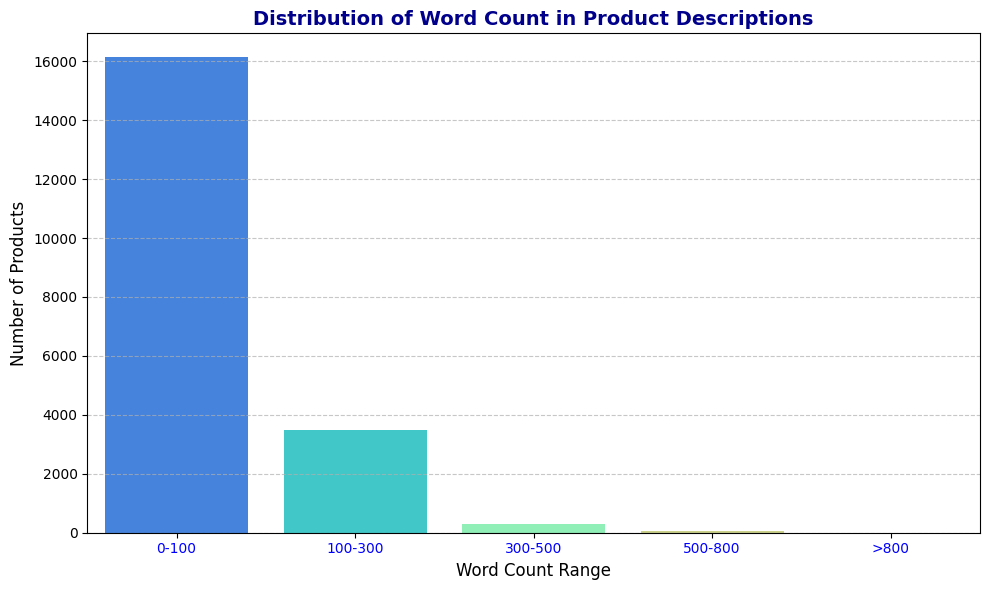

In [5]:
#add new length column to give the total length of the description input varriable
data['length'] = data['description'].str.len()

#add new column for storing number of words in description before text preprocessing
data['no_of_words'] = data['description'].apply(lambda x: len(x.split()) if isinstance(x, str) else np.nan)

#bins and labels
bins = [0, 100, 300, 500, 800, np.inf]
labels = ['0-100', '100-300', '300-500', '500-800', '>800']

#creating word count distribution
words_distribution = pd.cut(data['no_of_words'], bins=bins, labels=labels).value_counts().sort_index().reset_index()
words_distribution.columns = ['Word Count Bin', 'Frequency']

#Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Word Count Bin', y='Frequency', data=words_distribution, palette="rainbow")

#Add titles and labels
plt.title("Distribution of Word Count in Product Descriptions", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Word Count Range", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)

#Enhancing the aesthetics of the plot
plt.xticks(fontsize=10, color='blue')
plt.yticks(fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

#Display the plot
plt.tight_layout()
plt.show()


#### Exploring categories of the products

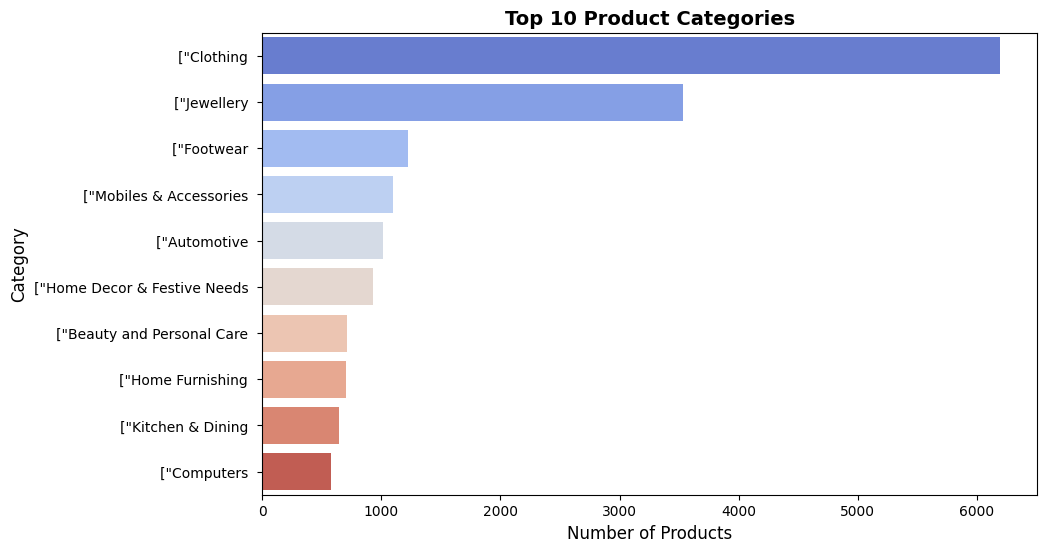

In [7]:
# Extract and clean category data
data['category'] = data['product_category_tree'].str.split('>>').str[0]
category_counts = data['category'].value_counts().head(10)  # Top 10 categories

# Plot category distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='coolwarm')

plt.title('Top 10 Product Categories', fontsize=14, fontweight='bold')
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   product_url              20000 non-null  object 
 2   product_name             20000 non-null  object 
 3   product_category_tree    20000 non-null  object 
 4   pid                      20000 non-null  object 
 5   retail_price             19922 non-null  float64
 6   discounted_price         19922 non-null  float64
 7   image                    19997 non-null  object 
 8   is_FK_Advantage_product  20000 non-null  bool   
 9   description              19998 non-null  object 
 10  product_rating           20000 non-null  object 
 11  overall_rating           20000 non-null  object 
 12  brand                    14136 non-null  object 
 13  product_specifications   19986 non-null  object 
 14  length                

In [9]:
data=data.drop(columns=['category'])

## Data preprocessing

In [11]:
data.isnull().sum()

uniq_id                       0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [12]:
#handling missing values
missing = pd.DataFrame(data.isnull().sum()).rename (columns = {0: 'missing' })
missing['percent'] = (missing['missing'] /len(data))*100
missing.sort_values ('percent', ascending = False)

,missing,percent
brand,5864,29.320
retail_price,78,0.390
discounted_price,78,0.390
product_specifications,14,0.070
image,3,0.015
description,2,0.010
uniq_id,0,0.000
product_url,0,0.000
product_name,0,0.000
product_category_tree,0,0.000


In [13]:
# fing ing the redundant or duplicate rows and removingthem

duplicate_rows = data[data.duplicated()]

# Print the number of duplicate rows found
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display the duplicate rows (if any)
if duplicate_rows.shape[0] > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

# Remove duplicate rows and keep the first occurrence
data_cleaned = data.drop_duplicates()

# Verify the result by checking the new shape of the dataset
print(f"Original dataset shape: {data.shape}")
print(f"Dataset shape after removing duplicates: {data_cleaned.shape}")


Number of duplicate rows: 0
No duplicate rows found.
Original dataset shape: (20000, 14)
Dataset shape after removing duplicates: (20000, 14)


##### Text preprocessing

There is a lot of unwanted information present in the text data. Let's clean it up. Text preprocessing tasks include

* Converting the text data to lowercase
* Removing/replacing the punctuations
* Removing/replacing the numbers
* Removing extra whitespaces
* Removing stop words
* Stemming and lemmatization

In [14]:
#to lowercase
data['description'] = data['description'].str.lower()

#removing punctivations
data['description'] = data['description'].str.replace(r'[^\w\d\s]',' ')

#replacing whitespace between terms with a single space
data['description'] = data['description'].str.replace(r'\s+',' ')

#removing leading and trailing whitespace
data['description'] = data['description'].str.replace(r'^\s+|\s+?$','')

data['description'].head()

0    key features of alisha solid women's cycling s...
1    fabhomedecor fabric double sofa bed (finish co...
2    key features of aw bellies sandals wedges heel...
3    key features of alisha solid women's cycling s...
4    specifications of sicons all purpose arnica do...
Name: description, dtype: object

### Removing stop words

In [15]:
import nltk
nltk.download('stopwords')

#Removing stop words
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\K Ravinder
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
import re

pattern = r'\b(?:{})\b'.format('|'.join(stop))
data['description'] = data['description'].str.replace(pattern, '')

# Removing single characters
data['description'] = data['description'].str.replace(r'\s+', ' ')
data['description'] = data['description'].apply(lambda x: " ".join([word for word in str(x).split() if len(word) > 1]))

# Removing domain related stop words from description
specific_stop_words = ["rs", "flipkart", "buy", "com", "free", "day", "cash", "replacement", "guarantee", "genuine", "key", "feature", "delivery", "products", "product", "shipping", "online", "india", "shop"]
data['description'] = data['description'].apply(lambda x: " ".join(word for word in str(x).split() if word not in specific_stop_words))

data['description'].head()

0    features of alisha solid women's cycling short...
1    fabhomedecor fabric double sofa bed (finish co...
2    features of aw bellies sandals wedges heel cas...
3    features of alisha solid women's cycling short...
4    specifications of sicons all purpose arnica do...
Name: description, dtype: object

##### Visualizing the most occured words in corpus 

In [18]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\K Ravinder
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\K Ravinder
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

[('women', 10547), ('color', 5631), ('specifications', 5145), ('men', 5027), ('casual', 4920), ('fabric', 4910), ('material', 4855), ('general', 4772), ('collection', 4615), ('set', 4439)]


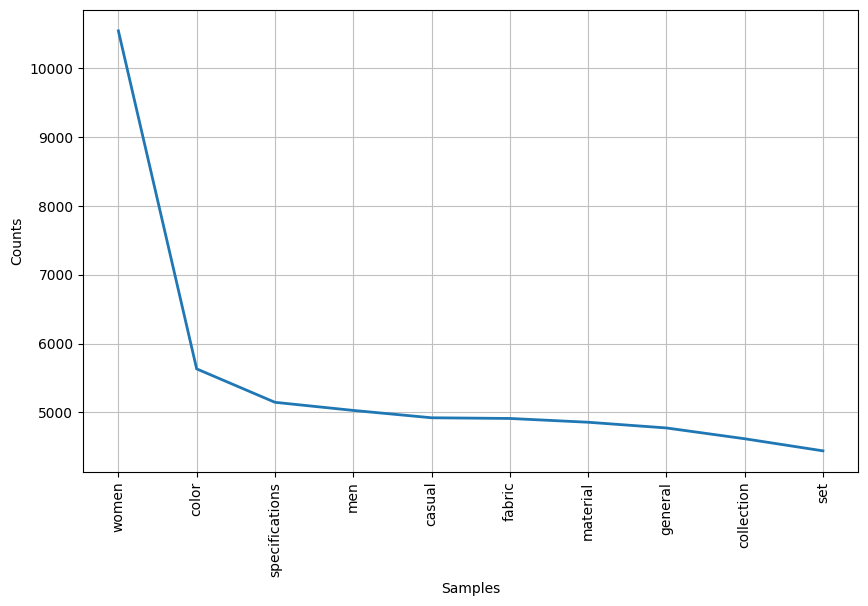

In [19]:
#most frequent words after removing domain related stopwords

# Custom stopwords list (including 'rs' and other domain-specific terms)
custom_stopwords = stopwords.words('english') + ['rs', 'type','details','guarantee','product', 'products', 'delivery', 'shipping', 'cm','price', 'features']

# Concatenate all product descriptions into a single string
a = data['description'].str.cat(sep=' ')

# Tokenize the text
words = nltk.tokenize.word_tokenize(a)

# Filter out non-alphabetic words and stopwords (both generic and domain-specific)
words = [word for word in words if re.match(r'^[a-zA-Z]+$', word) and word.lower() not in custom_stopwords]

# Create a frequency distribution of the remaining words
word_dist = nltk.FreqDist(words)

# Plot the top 10 most frequent words
plt.figure(figsize=(10, 6))
word_dist.plot(10, cumulative=False)

# Print the top 10 most frequent words
print(word_dist.most_common(10))

## Model Building

We build two models
* A content-based recommendation system
* A product search engine

###### TF-IDF approach 

## 1. Content-based Recommendation System -TF-IDF Approach

In [63]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [64]:
# Text cleaning: fill missing descriptions with empty strings
data['description'] = data['description'].fillna('')

# Define the vectorizer
T_vec = TfidfVectorizer(stop_words='english')

# Get the TF-IDF vectors for the descriptions
T_vec_matrix = T_vec.fit_transform(data['description'])

# Shape of the matrix
print(T_vec_matrix.shape)

(20000, 26198)


let's calculate similarity scores for each combination and generate matrix.

cosine similarity is used in this project. We need to write a function that takes product descriptions as input and lists N most similar items/products.

We also need to do reverse mapping of product names to their indices.

In [20]:
# Reversing the map of indices and product names
product_index = pd.Series(data.index, index=data['product_name']).drop_duplicates()
product_index.head()

product_name
Alisha Solid Women's Cycling Shorts      0
FabHomeDecor Fabric Double Sofa Bed      1
AW Bellies                               2
Alisha Solid Women's Cycling Shorts      3
Sicons All Purpose Arnica Dog Shampoo    4
dtype: int64

In [21]:
#Function that takes in product title as input and outputs the most similar product

def predict_products(text, N=10):
    # Check if the product exists in the dataset
    if text not in product_index:
        print(f"'{text}' is not found in the dataset. Please enter a valid product name.")
        return None
    
    # Get the index of the product
    index = product_index[text]
    
    # Calculate pairwise similarity scores between the input product and all others
    score_matrix = linear_kernel(T_vec_matrix[index], T_vec_matrix)
    
    # List of similarity scores
    matching_sc = list(enumerate(score_matrix[0]))
    
    # Sort the products based on similarity scores (highest first)
    matching_sc = sorted(matching_sc, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top N most similar products (excluding the input product itself)
    matching_sc = matching_sc[1:N+1]
    product_indices = [i[0] for i in matching_sc]
    
    # Return the names of the similar products
    return data['product_name'].iloc[product_indices]

# Input from the user
product_name = input("Enter a product name: ")

# Get recommendations
recommended_product = predict_products(product_name)

# If recommendations are found, print them
if recommended_product is not None:
    print("\nSimilar products:\n")
    for product in recommended_product:
        print(product)

Enter a product name:  comb


'comb' is not found in the dataset. Please enter a valid product name.


******************************************************************************************
Note: When building a search engine based on a dataset using content-based filtering, you will only be able to recommend or retrieve items that are present in your dataset. If a product detail is not in the data, the system will not be able to provide that information. This limitation arises because content-based filtering relies solely on the features and attributes of the items in the dataset to make recommendations. Therefore, any product not included in the dataset will not be accessible through the search engine.

***************************************

In [69]:
#LET'S try another example
product_name = input("Enter a product name: ")

recommended_product = predict_products(product_name)
if recommended_product is not None:
    print("\nSimilar products:\n")
    for product in recommended_product:
        print(product)

Enter a product name:  Lee Parke Running Shoes



Similar products:

Lee Parke Walking Shoes
N Five Running Shoes
Knight Ace Kraasa Sports Running Shoes, Cycling Shoes, Walking Shoes
WorldWearFootwear Running Shoes, Walking Shoes
reenak Running Shoes
Chazer Running Shoes
Glacier Running Shoes
Sonaxo Men Running Shoes
ETHICS Running Shoes
TOUCHWOOD Noble Light Black Sports Running Shoes


*******************

## 2. Product search engine - word2vec,cosine similarity,vectors,..

Key Notes:
* most of search engines are based on string matchings
To resolve this issue we use word embedings, using word2vec.
* word2vec- uses neural network -  2 ways - skip-gram and CBOW (common bag-of-words).


#### Implementation

We can utilize the pretrained Word2Vec model from Google on the news dataset. The model can be imported to obtain vectors for each word, allowing us to use various similarity measures to rank the results.

In [22]:
## loading data and preprocessing
# Create the description list
fin = []
for i in range(len(data['description'])):
    temp = []
    temp.append(data['description'][i])
    fin = fin + temp

# Extracting the relevant columns
data1 = data[['product_name', 'description']]

In [23]:
## Loading Pretrained Word2Vec Model
from gensim.models import KeyedVectors

# Load the Google News word2vec model
filename = ("GoogleNews-vectors-negative300.bin")  # Ensure you have this model file
model = KeyedVectors.load_word2vec_format(filename, binary=True, limit=50000)

In [24]:
## Stopwords Removal and Text Preprocessing Function
stop = nltk.corpus.stopwords.words('english')

# Function to remove stopwords and special characters
def remove_stopwords(text, is_lower_case=False):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text[0])  # Cleaning the first element from the list
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text


In [25]:
## Embedding Function Using Word2Vec
def get_embedding(word):
    if word in model.key_to_index:
        return model[word]
    else:
        return np.zeros(model.vector_size)  # Return zero vector if word is not in model

# Calculate word embeddings for each description and store the average vector
data['word_embeddings'] = data['description'].apply(lambda x: np.mean([get_embedding(word) for word in nltk.word_tokenize(remove_stopwords([x]))], axis=0))


In [26]:
## Creating Average Vectors for Descriptions
# Create a dictionary with descriptions and their average vectors
out_dict = {}
for sen in fin:
    average_vector = np.mean(np.array([get_embedding(x) for x in nltk.word_tokenize(remove_stopwords([sen]))]), axis=0)
    dict_temp = {sen: average_vector}
    out_dict.update(dict_temp)


In [27]:
# Cosine Similarity Function
def get_sim(query_embedding, average_vector_doc):
    sim = 1 - scipy.spatial.distance.cosine(query_embedding.flatten(), average_vector_doc.flatten())
    return sim

In [28]:
## ranking Function to Retrieve Similar Products
def Ranked_documents(query):
    query_words = np.mean(np.array([get_embedding(x) for x in nltk.word_tokenize(query.lower())], dtype=float), axis=0)
    rank = []
    
    # Calculate similarity with each document
    for k, v in out_dict.items():
        rank.append((k, get_sim(query_words, v)))
    
    # Sort based on similarity score (highest first)
    rank = sorted(rank, key=lambda t: t[1], reverse=True)
    
    # Merge with original data to get product names
    dd = pd.DataFrame(rank, columns=['Desc', 'score'])
    rankfin = pd.merge(data1, dd, left_on='description', right_on='Desc')
    rankfin = rankfin[['product_name', 'description', 'score']]
    
    print('Ranked Documents:')
    return rankfin

In [37]:
## Running the Search Query
# Input query and run the ranking function
query = input("Enter the product you are searching for - ")
result = Ranked_documents(query)

# Sort the result DataFrame by the score in descending order for most relevenat results
result_sorted = result.sort_values(by='score', ascending=False)

# Output the sorted result with most relevant product first
print("Most Relevant Products are :")
result_sorted

Enter the product you are searching for -  womens clothing


Ranked Documents:
Most Relevant Products are :


,product_name,description,score
12339,Victorian Clothing Women's Printed Casual Shirt,victorian clothing women's printed casual shir...,0.783502
12098,Vitally Clothing Casual Printed Women's Kurti,vitally clothing casual printed women's kurti ...,0.772175
11988,C M Clothing Women's Printed Casual Shirt,clothing women's printed casual shirt yellow c...,0.760320
11915,Victorian Clothing Women's Printed Casual Shirt,victorian clothing women's printed casual shir...,0.759516
168,Lee Men's Jeans,lee men's jeans lee men's jeans for only rs. 2...,0.727139
...,...,...,...
11455,The Jewelbox Brass Brass Bangle,the jewelbox brass brass bangle the jewelbox b...,0.058910
10952,Klick Women's Leggings,klick women's leggings price: rs. 219,0.057232
3350,Claude Lorrain Patent Loafers Patent Loafers,claude lorrain patent loafers patent loafers c...,0.054839
553,Ozel Studio Casual Sleeveless Printed Women's Top,nan,NaN


## 3. Advanced Search Engine Using PyTerrier and Sentence-BERT

### Not able to do because of jvm d11

In [19]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import nltk

# Downloading nltk resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Install and initialize PyTerrier
!pip install python-terrier
import pyterrier as pt
if not pt.started():
    pt.init()

# Install Sentence-BERT for sentence embeddings
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer

# Install SymSpell for spell correction
!pip install symspellpy
from symspellpy.symspellpy import SymSpell, Verbosity

# Install scikit-learn for cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/flipkart_com-ecommerce_sample.csv")

# Display the first few rows of the data
df.head()


[nltk_data] Downloading package punkt to C:\Users\K Ravinder
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\K Ravinder
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\K Ravinder
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Java started and loaded: pyterrier.java, pyterrier.terrier.java [version=5.11 (build: craig.macdonald 2025-01-13 21:29), helper_version=0.0.8]
C:\Users\K Ravinder Reddy\AppData\Local\Temp\ipykernel_20396\2769446802.py:26: DeprecationWarning: Call to deprecated method pt.init(). Deprecated since version 0.11.0.
java is now started automatically with default settings. To force initialisation early, run:
pt.java.init() # optional, forces java initialisation
  pt.init()


   ---------------------------------------- 0.0/275.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/275.9 kB 1.3 MB/s eta 0:00:01
   ------------- -------------------------- 92.2/275.9 kB 1.3 MB/s eta 0:00:01
   -------------------- ------------------- 143.4/275.9 kB 1.2 MB/s eta 0:00:01
   ----------------------------- ---------- 204.8/275.9 kB 1.2 MB/s eta 0:00:01
   ------------------------------------- -- 256.0/275.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 275.9/275.9 kB 1.1 MB/s eta 0:00:00

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB 660.6 kB/s eta 0:00:04
   - -------------------------------------- 0.1/2.6 MB 1.1 MB/s eta 0:00:03
   -- ------------------------------------- 0.1/2.6 MB 1.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.2/2.6 MB 1.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.2/2.6 MB 1.3 MB/s eta 0:00:02

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/flipkart_com-ecommerce_sample.csv'

In [3]:
!pip install python-terrier

In [6]:
import pyterrier as pt
if not pt.started():
    pt.init()


C:\Users\K Ravinder Reddy\AppData\Local\Temp\ipykernel_10948\2437485481.py:2: DeprecationWarning: Call to deprecated function (or staticmethod) started. (use pt.java.started() instead) -- Deprecated since version 0.11.0.
  if not pt.started():


Exception: Unable to create jni env, no jvm dll found.

## New method in google colab